### Ejemplo de Regresión Lineal Simple
Predecir el precio de una casa (precio) basado en:

- metros_cuadrados.
- habitaciones.
- antiguedad (años).

In [1]:
# CELDA 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

In [2]:
# CELDA 2: Generar datos realistas (o carga los tuyos)
np.random.seed(42)
n = 500

data = pd.DataFrame({
    'metros_cuadrados': np.random.uniform(40, 200, n),
    'habitaciones': np.random.randint(1, 6, n),
    'antiguedad': np.random.uniform(0, 40, n)
})

# Precio realista: base + m² + hab - antigüedad + ruido
data['precio'] = (
    50000 + 
    data['metros_cuadrados'] * 1200 + 
    data['habitaciones'] * 8000 - 
    data['antiguedad'] * 600 + 
    np.random.normal(0, 15000, n)
)

# Redondear
data['precio'] = data['precio'].round(0).astype(int)

print("Primeras filas:")
print(data.head())
print(f"\nEstadísticas:")
print(data.describe().round(1))

Primeras filas:
   metros_cuadrados  habitaciones  antiguedad  precio
0         99.926419             1   13.434634  186273
1        192.114289             1   33.004293  266316
2        157.119031             1   14.522368  261589
3        135.785357             5    1.369124  286738
4         64.962982             4   33.226180  135196

Estadísticas:
       metros_cuadrados  habitaciones  antiguedad    precio
count             500.0         500.0       500.0     500.0
mean              119.8           3.0        20.3  204746.5
std                47.8           1.4        11.6   60057.2
min                40.8           1.0         0.0   84992.0
25%                78.6           2.0        10.5  151585.8
50%               122.1           3.0        20.8  204499.5
75%               161.0           4.0        30.2  258881.5
max               198.9           5.0        40.0  317488.0


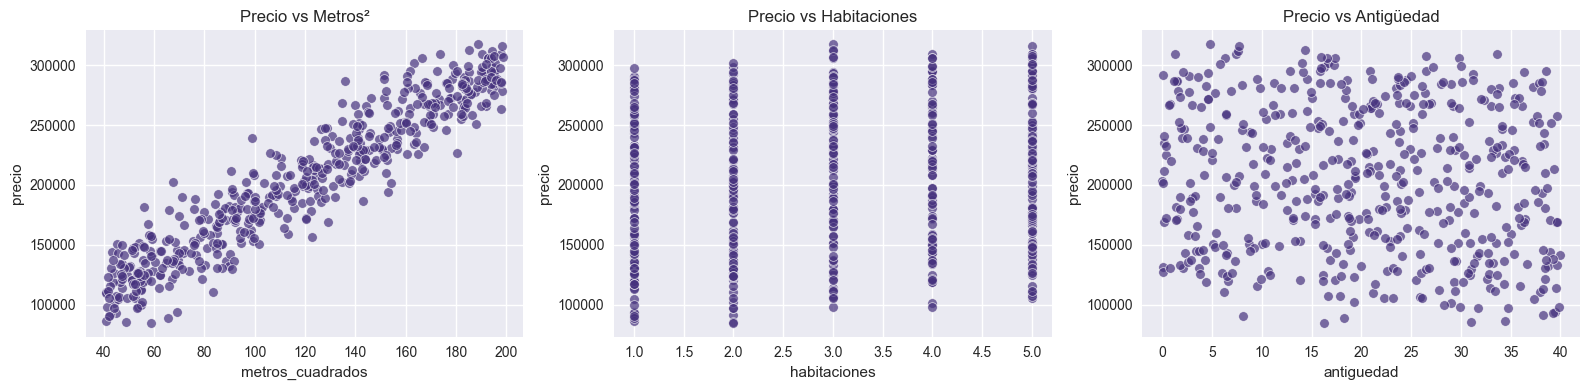

In [3]:
# CELDA 3: Visualización exploratoria
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.scatterplot(data=data, x='metros_cuadrados', y='precio', ax=axes[0], alpha=0.7)
axes[0].set_title("Precio vs Metros²")

sns.scatterplot(data=data, x='habitaciones', y='precio', ax=axes[1], alpha=0.7)
axes[1].set_title("Precio vs Habitaciones")

sns.scatterplot(data=data, x='antiguedad', y='precio', ax=axes[2], alpha=0.7)
axes[2].set_title("Precio vs Antigüedad")

plt.tight_layout()
plt.show()

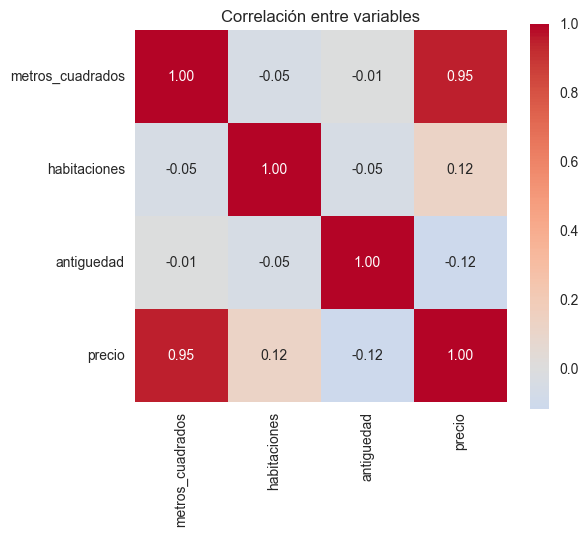

In [4]:
# CELDA 4: Matriz de correlación
plt.figure(figsize=(6,5))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title("Correlación entre variables")
plt.show()

In [5]:
# CELDA 5: Preparar datos
X = data[['metros_cuadrados', 'habitaciones', 'antiguedad']]
y = data['precio']

# Estandarizar (opcional, pero mejora interpretación)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
# CELDA 6: Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Modelo entrenado.")
print("Coeficientes:")
for var, coef in zip(['metros_cuadrados', 'habitaciones', 'antiguedad'], modelo.coef_):
    print(f"  {var}: {coef:,.1f}")
print(f"Intercepto: {modelo.intercept_:,.0f}")

Modelo entrenado.
Coeficientes:
  metros_cuadrados: 57,330.5
  habitaciones: 10,251.8
  antiguedad: -6,598.7
Intercepto: 204,429


In [7]:
# CELDA 7: Predicciones
y_pred = modelo.predict(X_test)

=== MÉTRICAS DE REGRESIÓN ===
MAE  (Error absoluto medio):    $12,497
RMSE (Raíz del error cuadrático): $15,687
R²   (Cuánto explica el modelo):  0.925


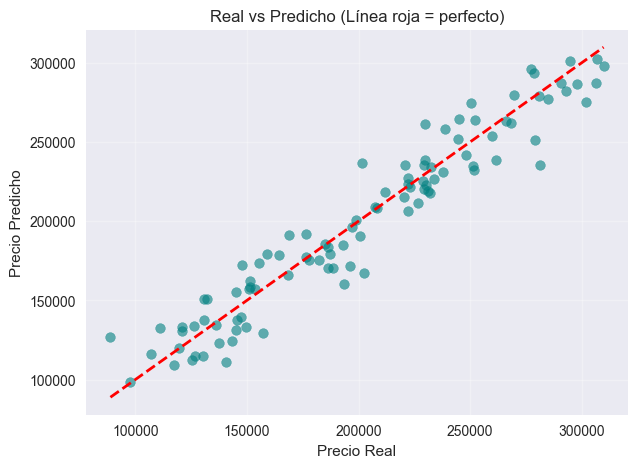

In [8]:
# CELDA 8: Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DE REGRESIÓN ===")
print(f"MAE  (Error absoluto medio):    ${mae:,.0f}")
print(f"RMSE (Raíz del error cuadrático): ${rmse:,.0f}")
print(f"R²   (Cuánto explica el modelo):  {r2:.3f}")

# Gráfico real vs predicho
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Real vs Predicho (Línea roja = perfecto)")
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# CELDA 9: Predecir una casa nueva
nueva_casa = pd.DataFrame({
    'metros_cuadrados': [85],
    'habitaciones': [3],
    'antiguedad': [12]
})

nueva_scaled = scaler.transform(nueva_casa)
prediccion = modelo.predict(nueva_scaled)[0]

print(f"\nCasa de 85 m², 3 habitaciones, 12 años de antigüedad:")
print(f"→ Precio predicho: ${prediccion:,.0f}")


Casa de 85 m², 3 habitaciones, 12 años de antigüedad:
→ Precio predicho: $167,723


![](img/ejemplo_regresion_lineal.png)